In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [5]:
df = pd.read_csv("mushrooms.csv")

In [6]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
x = pd.get_dummies(df.iloc[:,1:])
y = pd.get_dummies(df.iloc[:,0])                 

In [9]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [10]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu',
    input_shape= (x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1],
    activation= 'softmax')]
                                 )

C:\Users\heart\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
history = model.fit(x_train, y_train,
        epochs=100, batch_size=32,
        validation_data=(x_test,y_test))

Epoch 1/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9356 - loss: 0.1805 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 2/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.6940e-04 - val_accuracy: 1.0000 - val_loss: 1.7262e-04
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.1038e-04 - val_accuracy: 1.0000 - val_loss: 7.4453e-05
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.7471e-05 - val_accuracy: 1.0000 - val_loss: 2.5846e-05
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.6647e-05 - val_accuracy: 1.0000 - val_loss: 1.4502e-05
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.0034e-05 - val_accuracy: 1.0000 - val_loss: 9.5068e-06
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.5227e-06 - val_accuracy: 1.0000 - val_loss: 6.3385e-06
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [13]:
y_pred = model.predict(x_test)
y_pred_classes= np.argmax(y_pred, axis=1)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [14]:
y_test_classes = np.argmax(y_test.values, axis=1)

In [15]:
cm = confusion_matrix(y_test_classes, y_pred_classes)

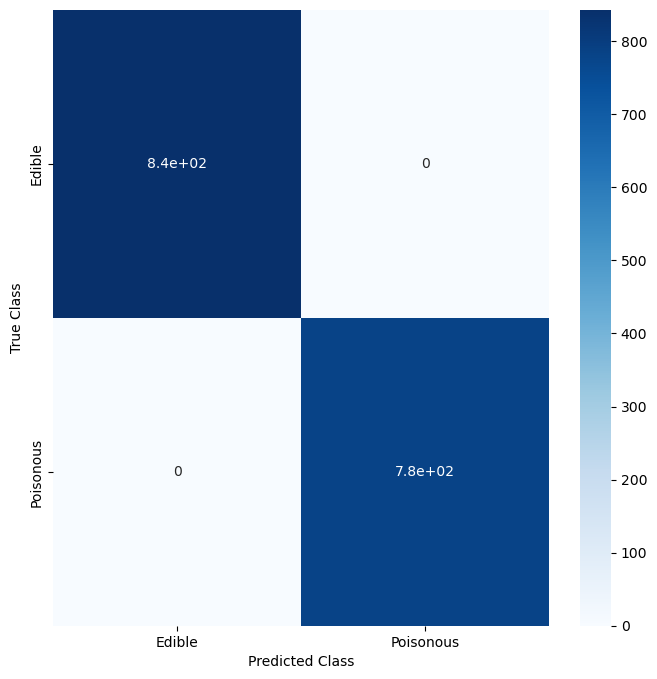

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, cmap="Blues",
xticklabels=['Edible', 'Poisonous'],
yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

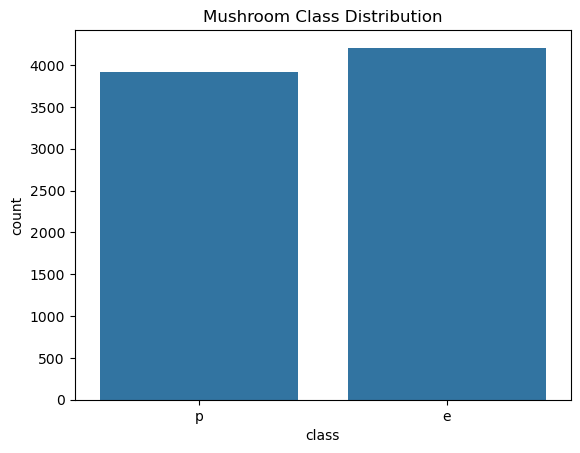

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      1263
        True       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Cross-Validation Accuracy Scores: [1.         1.         1.         1.         0.98706897]
Mean CV Accuracy: 0.9974137931034482


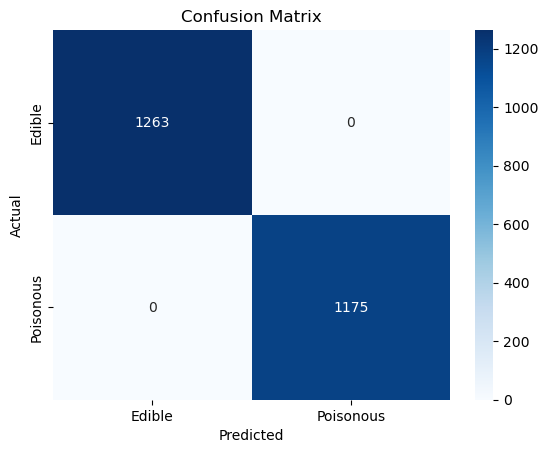

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("mushrooms.csv")

# Show class distribution
sns.countplot(x='class', data=df)
plt.title("Mushroom Class Distribution")
plt.show()

# One-Hot Encoding for all categorical variables
df_encoded = pd.get_dummies(df)

# Separate features and target
X = df_encoded.drop("class_p", axis=1)  # 'class_p' corresponds to poisonous
y = df_encoded["class_p"]

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy and report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Cross-validation score (5-fold)
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [18]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1263
        True       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [20]:
!pip install scikeras

Defaulting to user installation because normal site-packages is not writeable


In [21]:

from sklearn.model_selection import cross_val_score, StratifiedKFold
from scikeras.wrappers import KerasClassifier  # updated wrapper
import numpy as np

# Define a function to create the model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu', input_shape=(X.shape[1],)),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Wrap the model
keras_model = KerasClassifier(model=create_model, epochs=10, batch_size=32, verbose=0)

# Setup Stratified K-Fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation
results = cross_val_score(keras_model, X, y, cv=kfold, scoring='accuracy')

# Print the results
print("Cross-validation accuracy scores:", results)
print("Mean accuracy: {:.4f}, Std Dev: {:.4f}".format(results.mean(), results.std()))


C:\Users\heart\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\heart\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\heart\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__i

Cross-validation accuracy scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0000, Std Dev: 0.0000
